In [0]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print('Landsat on AWS:')
filepath = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/040/037/LC08_L1TP_040037_20180707_20180707_01_RT/LC08_L1TP_040037_20180707_20180707_01_RT_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7691, 'height': 7821, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 371085.0,
       0.0, -30.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [0]:
print('Landsat on AWS:')
filepath = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/040/037/LC08_L1TP_040037_20180707_20180707_01_RT/LC08_L1TP_040037_20180707_20180707_01_RT_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7691, 'height': 7821, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 371085.0,
       0.0, -30.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


[3, 9, 27, 81]
Decimation factor= 9


Text(0, 0.5, 'Row #')

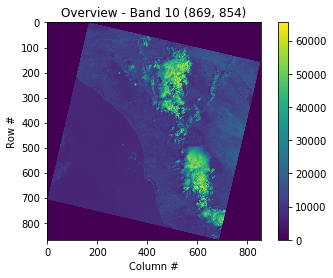

In [0]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    print(oviews)
    oview = oviews[1] # let's look at the smallest thumbnail
    print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))



plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 10 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [0]:
def getband(url, bandfile):
    with rasterio.open(url+bandfile) as src:
        profile = src.profile
        oviews = src.overviews(1) # list of overviews from biggest to smallest
        oview = oviews[1]  # Use second-highest resolution overview
        print('Decimation factor= {}'.format(oview))
        band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
        band = band.astype('f4')
        band[band==0] = np.nan
    return band

def plotband(title,band):
    plt.imshow(band)
    plt.colorbar()
    plt.title('\n{} {}'.format(title, band.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')
def plotband(title,band, axis):
    plt.sca(axis)
    plt.imshow(band, cmap='RdYlGn')
    plt.colorbar()
    plt.title('\n{} {}'.format(title, band.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')    

In [0]:
date = '2018-07-07'
url = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/040/037/LC08_L1TP_040037_20180707_20180707_01_RT/'
blueband = 'LC08_L1TP_040037_20180707_20180707_01_RT_B{}.TIF'.format(2)
redband = 'LC08_L1TP_040037_20180707_20180707_01_RT_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_040037_20180707_20180707_01_RT_B{}.TIF'.format(5)
thermalband = 'LC08_L1TP_040037_20180707_20180707_01_RT_B{}.TIF'.format(10)
swirband = 'LC08_L1TP_040037_20180707_20180707_01_RT_B{}.TIF'.format(6)
blue = getband(url, blueband)
print(blue)

red = getband(url, redband)

nir = getband(url, nirband)

therm = getband(url, thermalband)

swir = getband(url, swirband)

Decimation factor= 9
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Decimation factor= 9
Decimation factor= 9
Decimation factor= 9
Decimation factor= 9


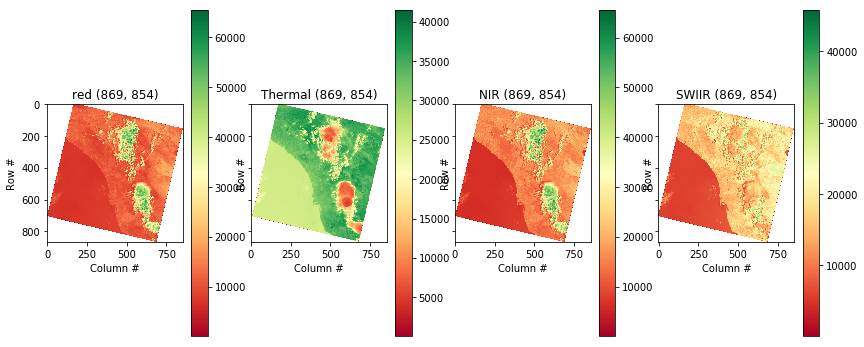

In [0]:
fig, axes = plt.subplots(1,4, figsize=(14,6), sharex=True, sharey=True)
plotband("red",band=red, axis=axes[0])
plotband("Thermal", band=therm, axis=axes[1])
plotband("NIR", band=nir, axis=axes[2])
plotband("SWIIR", band=swir, axis=axes[3])

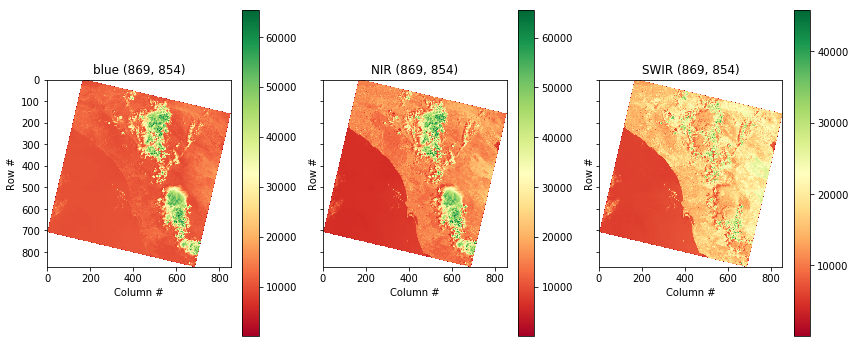

In [0]:
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)
plotband("blue",band=blue, axis=axes[0])
plotband("NIR", band=nir, axis=axes[1])
plotband("SWIR", band=swir, axis=axes[2])

In [0]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi



430386


Text(0, 0.5, 'Row #')

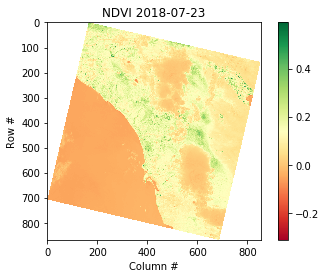

In [0]:
ndvi = calc_ndvi(nir,red)
#print(ndvi)
print(len(np.unique(ndvi[~np.isnan(ndvi)])))
plt.imshow(ndvi, cmap='RdYlGn')
#plt.imshow(ndvi, cmap='Spectral')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [0]:
localname = 'LC08_L1TP_040037_20180707_20180707_01_RT.tif'

with rasterio.open(url+nirband) as src:
    profile = src.profile.copy()

    aff = src.transform
    newaff = rasterio.Affine(aff.a * oview, aff.b, aff.c,
                             aff.d, aff.e * oview, aff.f)
    profile.update({
            'dtype': 'float32',
            'height': ndvi.shape[0],
            'width': ndvi.shape[1],
            'transform': newaff})  

    with rasterio.open(localname, 'w', **profile) as dst:
        dst.write_band(1, ndvi)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 854, 'height': 869, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(270.0, 0.0, 371085.0,
       0.0, -270.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Text(0, 0.5, 'Row #')

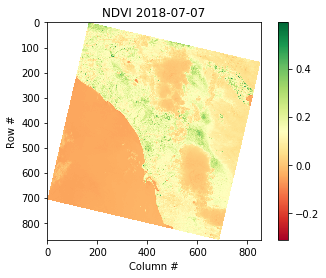

In [0]:
# Reopen the file and plot
with rasterio.open(localname) as src:
    print(src.profile)
    ndvi = src.read(1) # read the entire array

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [0]:
with rasterio.open(localname) as src:
    # Use pyproj to convert point coordinates
    utm = pyproj.Proj(src.crs) # Pass CRS of image from rasterio
    lonlat = pyproj.Proj(init='epsg:4326')

    #lon,lat = (-118.39943, 32.10779)
    lon,lat = (-117.16, 32.71)
    east,north = pyproj.transform(lonlat, utm, lon, lat)

    print('San Diego NDVI\n-------')
    print(f'lon,lat=\t\t({lon:.2f},{lat:.2f})')
    print(f'easting,northing=\t({east:g},{north:g})')

    # What is the corresponding row and column in our image?
    row, col = src.index(east, north) # spatial --> image coordinates
    print(f'row,col=\t\t({row},{col})')

    # What is the NDVI?
    value = ndvi[row, col]
    print(f'ndvi=\t\t\t{value:.2f}')


    # Or if you see an interesting feature and want to know the spatial coordinates:
    row, col = 700, 600
    east, north = src.xy(row,col) # image --> spatial coordinates
    lon,lat = pyproj.transform(utm, lonlat, east, north)
    value = ndvi[row, col]
    print(f'''
Interesting Feature
-------
row,col=          ({row},{col})
easting,northing= ({east:g},{north:g})
lon,lat=          ({lon:.2f},{lat:.2f})
ndvi=              {value:.2f}
''')


San Diego NDVI
-------
lon,lat=		(-117.16,32.71)
easting,northing=	(485005,3.61915e+06)
row,col=		(624,418)
ndvi=			0.09

Interesting Feature
-------
row,col=          (700,600)
easting,northing= (534120,3.59868e+06)
lon,lat=          (-116.64,32.52)
ndvi=              0.03



In [0]:
#Second set of data
filepath = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/040/037/LC08_L1TP_040037_20180723_20180731_01_T1/LC08_L1TP_040037_20180723_20180731_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)
url = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/040/037/LC08_L1TP_040037_20180723_20180731_01_T1/'
redband2 = 'LC08_L1TP_040037_20180723_20180731_01_T1_B{}.TIF'.format(4)
nirband2 = 'LC08_L1TP_040037_20180723_20180731_01_T1_B{}.TIF'.format(5)
thermalband2 = 'LC08_L1TP_040037_20180723_20180731_01_T1_B{}.TIF'.format(10)
swirband2 = 'LC08_L1TP_040037_20180723_20180731_01_T1_B{}.TIF'.format(6)

red2 = getband(url, redband2)

nir2 = getband(url, nirband2)

therm2 = getband(url, thermalband2)
swir2 = getband(url, swirband2)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7681, 'height': 7821, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 371985.0,
       0.0, -30.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
Decimation factor= 9
Decimation factor= 9
Decimation factor= 9
Decimation factor= 9


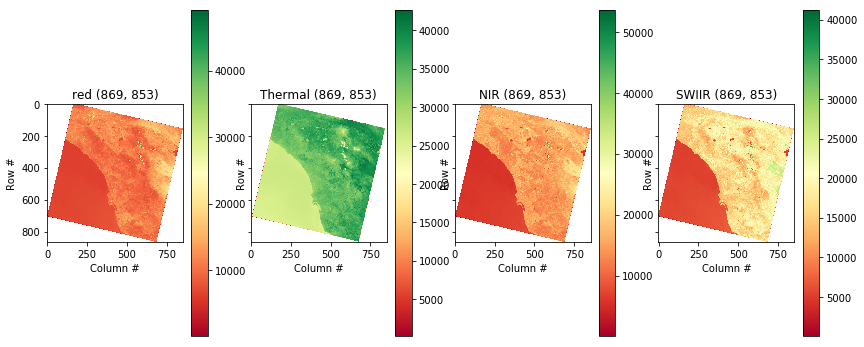

In [0]:
fig, axes = plt.subplots(1,4, figsize=(14,6), sharex=True, sharey=True)
plotband("red",band=red2, axis=axes[0])
plotband("Thermal", band=therm2, axis=axes[1])
plotband("NIR", band=nir2, axis=axes[2])
plotband("SWIIR", band=swir2, axis=axes[3])

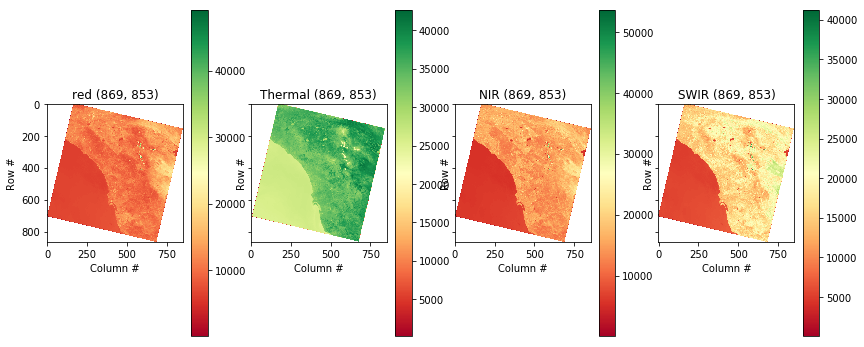

In [0]:
fig, axes = plt.subplots(1,4, figsize=(14,6), sharex=True, sharey=True)
plotband("red",band=red2, axis=axes[0])
plotband("Thermal", band=therm2, axis=axes[1])
plotband("NIR", band=nir2, axis=axes[2])
plotband("SWIR", band=swir2, axis=axes[3])

Text(0, 0.5, 'Row #')

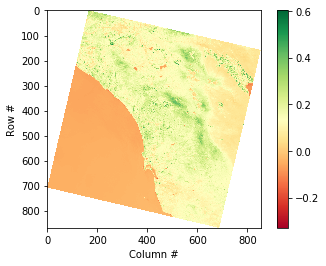

In [0]:
ndvi2 = calc_ndvi(nir2,red2)
plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
#plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [0]:
localname = 'LC08_L1TP_040037_20180723_20180731_01_RT.tif'
date = '2018-07-23'
with rasterio.open(url+nirband2) as src:
    profile = src.profile.copy()

    aff = src.transform
    newaff = rasterio.Affine(aff.a * oview, aff.b, aff.c,
                             aff.d, aff.e * oview, aff.f)
    profile.update({
            'dtype': 'float32',
            'height': ndvi2.shape[0],
            'width': ndvi2.shape[1],
            'transform': newaff})  

    with rasterio.open(localname, 'w', **profile) as dst:
        dst.write_band(1, ndvi2)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 853, 'height': 869, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(270.0, 0.0, 371985.0,
       0.0, -270.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Text(0, 0.5, 'Row #')

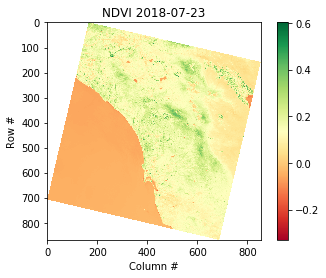

In [0]:
# Reopen the file and plot
with rasterio.open(localname) as src:
    print(src.profile)
    ndvi = src.read(1) # read the entire array

plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [0]:
with rasterio.open(localname) as src:
    # Use pyproj to convert point coordinates
    utm = pyproj.Proj(src.crs) # Pass CRS of image from rasterio
    lonlat = pyproj.Proj(init='epsg:4326')

    #lon,lat = (-118.39943, 32.10779)
    lon,lat = (-117.16, 32.71)
    east,north = pyproj.transform(lonlat, utm, lon, lat)

    print('San Diego NDVI\n-------')
    print(f'lon,lat=\t\t({lon:.2f},{lat:.2f})')
    print(f'easting,northing=\t({east:g},{north:g})')

    # What is the corresponding row and column in our image?
    row, col = src.index(east, north) # spatial --> image coordinates
    print(f'row,col=\t\t({row},{col})')

    # What is the NDVI?
    value = ndvi2[row, col]
    print(f'ndvi=\t\t\t{value:.2f}')


    # Or if you see an interesting feature and want to know the spatial coordinates:
    row, col = 500, 600
    east, north = src.xy(row,col) # image --> spatial coordinates
    lon,lat = pyproj.transform(utm, lonlat, east, north)
    value = ndvi2[row, col]
    print(f'''
Interesting Feature
-------
row,col=          ({row},{col})
easting,northing= ({east:g},{north:g})
lon,lat=          ({lon:.2f},{lat:.2f})
ndvi=              {value:.2f}
''')

San Diego NDVI
-------
lon,lat=		(-117.16,32.71)
easting,northing=	(485005,3.61915e+06)
row,col=		(624,418)
ndvi=			0.04

Interesting Feature
-------
row,col=          (500,600)
easting,northing= (534120,3.65268e+06)
lon,lat=          (-116.63,33.01)
ndvi=              0.27



In [0]:
#3rd set
url = 'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/139/207/LC08_L1GT_139207_20180814_20180814_01_RT/'
redband3 = 'LC08_L1GT_139207_20180814_20180814_01_RT_B{}.TIF'.format(4)
nirband3 = 'LC08_L1GT_139207_20180814_20180814_01_RT_B{}.TIF'.format(5)
thermalband3 = 'LC08_L1GT_139207_20180814_20180814_01_RT_B{}.TIF'.format(10)
swirband3 = 'LC08_L1GT_139207_20180814_20180814_01_RT_B{}.TIF'.format(6)

red3 = getband(url, redband3)

nir3 = getband(url, nirband3)

therm3 = getband(url, thermalband3)
swir3 = getband(url, swirband3)

In [0]:
fig, axes = plt.subplots(1,4, figsize=(14,6), sharex=True, sharey=True)
plotband("red",band=red3, axis=axes[0])
plotband("Thermal", band=therm3, axis=axes[1])
plotband("NIR", band=nir3, axis=axes[2])
plotband("SWIIR", band=swir3, axis=axes[3])